# MSc Project : analysis 02 complete data

### Setting up the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask.array as da
import xesmf as xe
import netCDF4
import pandas as pd
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
from dask.distributed import Client
%matplotlib inline

In [2]:
from functions import ccplot, binning

In [3]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='YlGnBu')

In [5]:
client = Client(n_workers=4, 
                threads_per_worker=1,
                memory_limit='64GB')

### Impoting and preparing data

In [6]:
# mfdata_DIR = './data/GPM_data/*.nc'

# gpm = xr.open_mfdataset(mfdata_DIR, chunks={'time':10000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
gpm = xr.open_dataset('./data/GPM_data/gpm_2000.nc', chunks={"time":2000})

In [7]:
gpm = gpm.unify_chunks()
gpm.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 2000, 272), 'bnds': (2,), 'lon': (401,), 'lat': (401,)})

In [8]:
gpm = gpm.drop_dims('bnds')

In [9]:
gpm = gpm.transpose('time', 'lat', 'lon')

In [10]:
# ds_out = xr.Dataset({'lat': (['lat'], np.arange(0, 40.25, 0.25)),
#                      'lon': (['lon'], np.arange(60, 100.25, 0.25)),
#                     }
#                    )
# ds_out

In [11]:
# regridder = xe.Regridder(gpm, ds_out, 'bilinear')
# # regridder.clean_weight_file()
# regridder

In [12]:
# precip = regridder(gpm.precipitationCal)

In [14]:
gpm = gpm.persist()

In [15]:
# precip = precip.resample(time = '1H').mean()

In [16]:
gpm

<xarray.Dataset>
Dimensions:             (time: 10272, lon: 401, lat: 401)
Coordinates:
  * time                (time) datetime64[ns] 2000-06-01 ... 2000-12-31T23:30:00
  * lon                 (lon) float32 60.05 60.15 60.25 ... 99.85 99.95 100.1
  * lat                 (lat) float32 -0.05 0.05 0.15 0.25 ... 39.75 39.85 39.95
Data variables:
    precipitationCal    (time, lat, lon) float32 dask.array<chunksize=(2000, 401, 401), meta=np.ndarray>
    precipitationUncal  (time, lat, lon) float32 dask.array<chunksize=(2000, 401, 401), meta=np.ndarray>
    IRprecipitation     (time, lat, lon) float32 dask.array<chunksize=(2000, 401, 401), meta=np.ndarray>
Attributes:
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauth...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         Tue Oct 26 15:21:29 2021: cdo mergetime ...
    CDO:                             Climate Data Operators version 1.9.10 (h...

distributed.nanny - WARNING - Restarting worker
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/nkv/.miniconda/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/home/nkv/.miniconda/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/__init__.py", line 2, in <module>
    from . import widgets  # isort:skip; load distributed widgets second
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/widgets/__init__.py", line 5, in <module>
    from ..utils import key_split
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/utils.py", line 95, in <module>
    mp_context = _initialize_mp_context()
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/utils.py", line 86, in _initialize_mp_context
    importlib.import_module(

KeyboardInterrupt: 

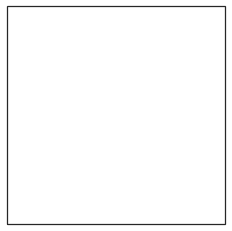

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
gpm.precipitationCal.isel(time=0).plot.contourf(ax = ax, extend='neither', levels=15)
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False

In [6]:
mfdata_DIR2 = './data/era_data/*.nc'

era = xr.open_mfdataset(mfdata_DIR2, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [7]:
era = era.unify_chunks()
era.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 775), 'latitude': (161,), 'longitude': (161,), 'expver': (2,)})

In [8]:
era = era.sel(expver=1, drop=True)

In [9]:
era = era.transpose('time', 'latitude', 'longitude')

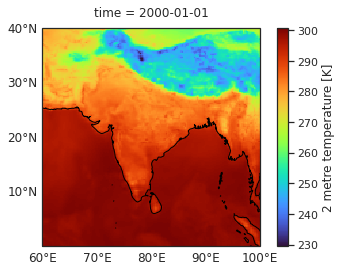

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
era.t2m.isel(time=0).plot(ax = ax, cmap='turbo')
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False

In [11]:
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))

In [12]:
era

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 184800)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...